# Overview of Scenario
***
The following cells will detect fraudulent labels by using a selected image as a base target image.
The notebook will display images of labels that the deep learning one shot system selects as being fraudulent. Then the notebook will display images of labels that the system selects as being non-fradulent. The deep learning model used to identify these fraudulent images is built in the LabelValidationFunc.py file. This notebook will go through the following steps:

* First: Show which is the target label image
* Second: Show which images the fraud detection system selects as fraudulent
* Third: Show which images the fraud detection system selects as non-fraudulent

#### For our use-case, we want to identify any fraudulent images similar to the following trademarked image:
<img style="float: left;" src="TestData/test66.jpg" width="200" height="200"/>


# Configure our notebook to run the deep learning model

This section of the notebook imports packages needed for the deep learning model including our LabelValidationFunc where our model is actually defined.

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from scipy.spatial import distance as dist
import cv2
from numpy.random import seed
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import numpy as np
import os
import glob
import json
import LabelValidationFunc as lf

Using TensorFlow backend.


# Gather Our Target Image

The target image represents the company's copyrighted image that we will be used to determine as fraudulent images.  The target image is a registered trademark and all other images will be compared against it:

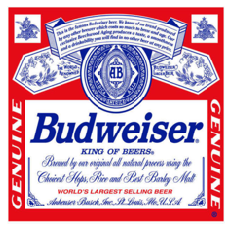

In [2]:
labelImages_dir = "."
x = np.zeros((2, 224, 224, 3))
l2_reg = 0

ConfigJson = {}
with open('FraudLabelConfig.json', 'r') as inpfile:
    ConfigJson = json.load(inpfile)
ModelName = ConfigJson['model_name']
ImagePathName = labelImages_dir + '/' + ConfigJson['target_directory'] + '/'
PercentThres = float(ConfigJson['scale_factor_for_threshold'])
TargetImageFileName = ImagePathName + ConfigJson['target_image_file_name']
target_image_file_name = TargetImageFileName
target_image= Image.open(TargetImageFileName)
subject02 = target_image.convert('RGB')
subj02 = subject02.resize((224, 224))
subj02_a = np.array(subj02)
plt.imshow(subj02_a)
plt.axis('off')
plt.show()

# Detected Fradulent Labels:

From the constructed dataset, the fraud detection system now will detect which labels are fraudulent. The output shows the file name of the image currently being processed and the score which that image recieved. A lower score means that the image was determined to be more fraudulent.

shape = 262144
11.263333333333335
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.33.14 AM.jpg
11.50569
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.34.45 AM.jpg
17.187025
file_name = ./TestData/labelImages/Screen Shot 2019-12-15 at 8.37.31 AM.jpg
15.845816
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.31.40 AM.jpg
13.437786
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.35.30 AM.jpg
21.385872
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.36.01 AM.jpg
13.569544
file_name = ./TestData/labelImages/test13.jpg
14.248187
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.36.54 AM.jpg
16.80481
file_name = ./TestData/labelImages/Beer_Label_99.jpg
18.962936
file_name = ./TestData/labelImages/Lager_Label.jpg
13.348824
file_name = ./TestData/labelImages/Screen Shot 2019-12-14 at 8.36.33 AM.jpg
12.403352
file_name = ./TestData/labelImages/test6.jpg
18.313936
file_name = ./TestData/labelImages/Wine_Label

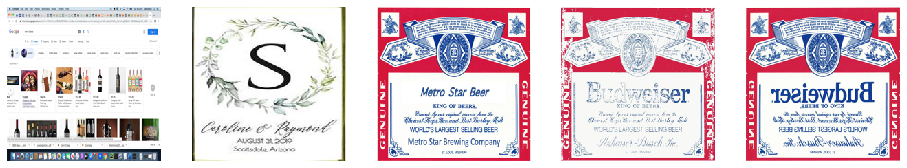

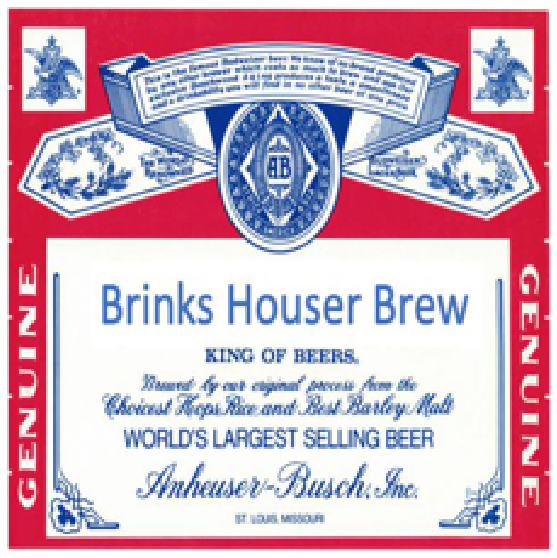

['./TestData/labelImages/Screen Shot 2019-12-14 at 8.32.22 AM.jpg', './TestData/labelImages/Wine_Label_3.jpg', './TestData/labelImages/Beer_Label_22.jpg', './TestData/labelImages/Bud_Label_LessColors.jpg', './TestData/labelImages/Bud_Label_hozFlip.jpg', './TestData/labelImages/Beer_Label_44.jpg']


In [3]:
mypath = ImagePathName + '/'

seed(200)
tf.compat.v1.random.set_random_seed(1000)

if('art' in ModelName):
    [lb_model, be_l, cor01, similar_diff, x_only] = lf.GenerateModelArt(TargetImageFileName, l2_reg, x)
    file_name_list = lf.DisplayFraudulentLabelsArt(mypath, PercentThres, lb_model, be_l, cor01, 
                                                similar_diff, TargetImageFileName, x_only, x)
    #print(file_name_list)
else:
    [lb_model, be_l, num_bins, max_histo_level] = lf.GenerateModelLinear(TargetImageFileName,
                                                                        l2_reg, x)
    file_name_list = lf.DisplayFraudulentLabelsLinear(mypath, PercentThres, lb_model, be_l, 
                                                   num_bins, max_histo_level, 
                                                   TargetImageFileName, x)
    #print(file_name_list)

# Detected Non-Fraudulent Labels:

From the constructed dataset, the fraud detection system now will detect which labels are non-fraudulent. These images were not tagged as potentially fraudulent when compared to our target image.

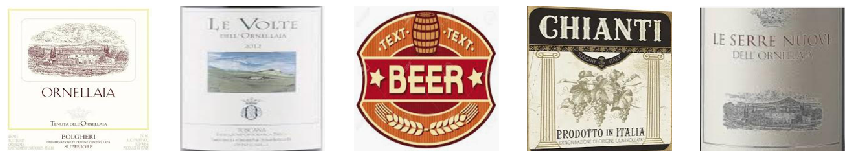

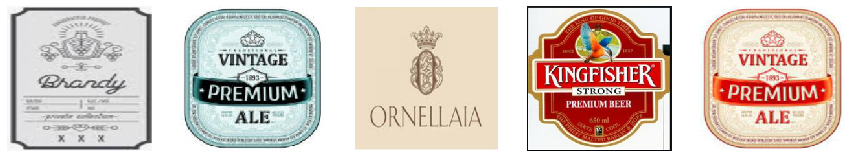

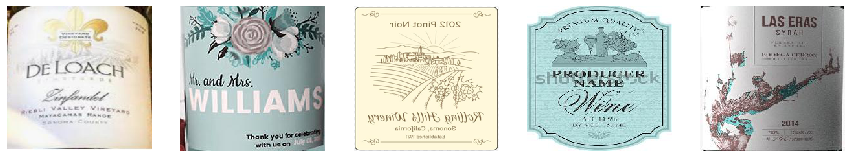

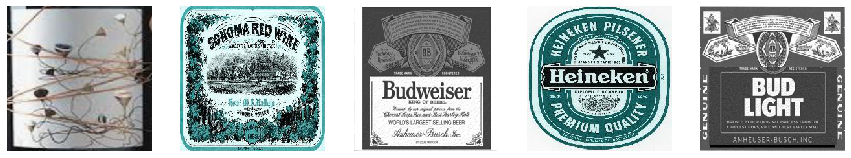

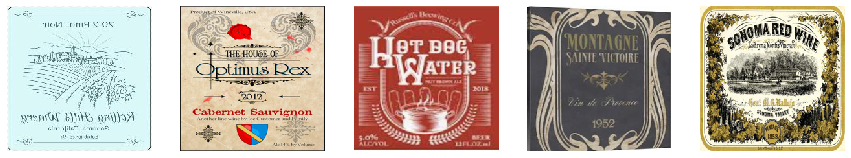

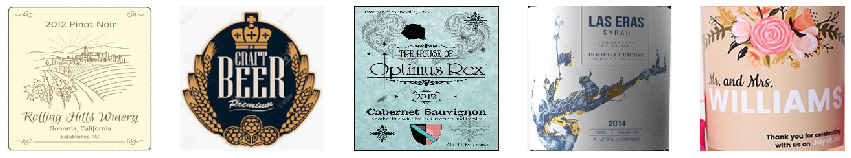

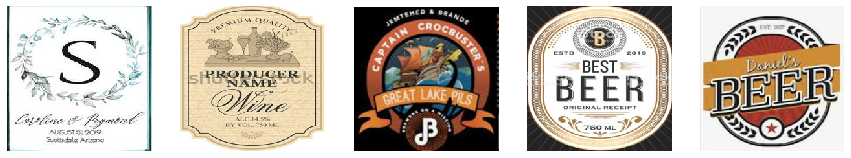

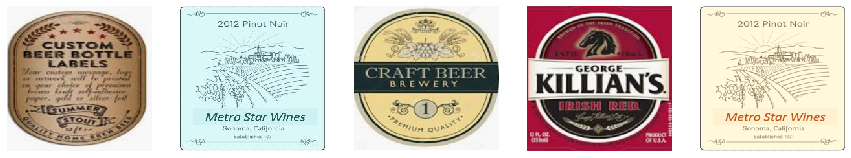

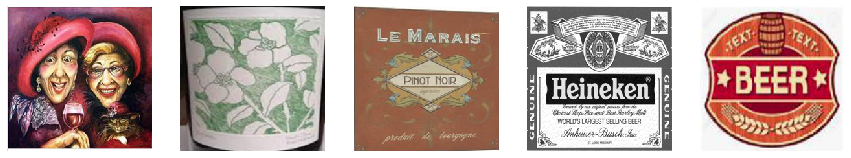

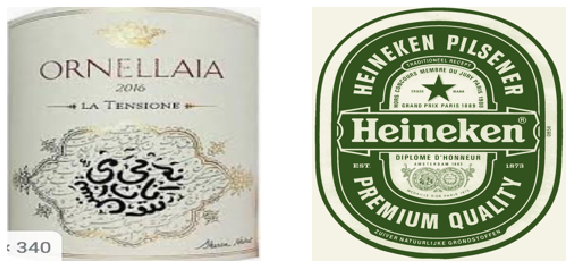

2


In [4]:
img_cnt = lf.DisplayNonFraudulentLabels(file_name_list, mypath)
print(img_cnt)